# Stones2Milestones Assignment

### This is a compilation of only the answers to the assignment.
**For the detailed analysis and the code behind click here:**<br> https://nbviewer.jupyter.org/github/santakmohanty/S2M/blob/master/Analysis.ipynb <br>
The plots are interactive, Hover on the charts, click on the legends, and use toolbar on the top right corner.

**List of Objectives:**<br>
1. Sales conversion with respect to Trainers<br>
2. Sales conversion with respect to Time slot<br>
3. Sales conversion with respect to Topic<br>
4. Sales conversion with respect to Source (Field available in Interested Users)<br>
5. Sales conversion wrt grade<br>
6. Time taken for Sales conversion<br>
7. Time slot – attendance %<br>

### Q1. Sales Conversion with respect to trainers.

**Steps Involved:**
- We pick the registered number for all the sales above 499 the 'Subscription Bought' sheet.
- Now we look up the numbers in the 'Booked Users' sheet and find the attended batch information.
- Using the batch information we find the correponding trainer form the 'Trainers' Sheet.
- Record the sale number and amount against each trainer.

In [61]:
# First 5 entries of the metric, Arranged according to faculty Name.
trainer_performance.head()

,Trainer Name,No. of students subscribed,No. of students attended,Sale Conversion [%]
1,FAC_5002,4,68,5.88
2,FAC_5003,3,11,27.27
4,FAC_5006,5,31,16.13
5,FAC_5007,1,9,11.11
6,FAC_5008,5,57,8.77


In [90]:
import plotly.express as px

px.bar(trainer_performance,x='Trainer Name', y='Sale Conversion [%]',color='Sale Conversion [%]',\
       color_continuous_scale='darkmint', title='Sale Conversion by Trainers')

### Q2. Sales conversion with respect to Time slot

In [67]:
# First 5 entries of the metric.
Time_slot_performance.head()

,Time Slot,No. of students subscribed,No. of students attended,Sale Conversion [%]
0,04:00 PM,12,155,7.74
1,06:00 PM,21,249,8.43
2,06:15 PM,17,152,11.18
3,11:15 AM,14,113,12.39
4,11:45 AM,19,235,8.09


In [1164]:
px.bar(Time_slot_performance,x='Time Slot', y='Sale Conversion [%]',color='Time Slot',\
       title='Sale Conversion in by Time Slot')

### Q2. Sales conversion with respect to Topic

In [73]:
# First 5 entries of the metric.

Topic_performance.head()

,Topic,No. of students subscribed,No. of students attended,Sale Conversion [%]
0,Word Whiz,11,139,7.91
1,In my mind's eye,7,94,7.45
2,Name it,7,82,8.54
3,Rocking with rhymes,6,59,10.17
4,Structure of a story,5,61,8.20


In [1170]:
px.bar(Topic_performance,x='Topic', y='Sale Conversion [%]',color='Topic',\
       title='Sale Conversion by Topic')

### Q4. Sales conversion with respect to Source.

In [81]:
Source_performance.head()

,Source,No. of students subscribed,No. of students interested,Sale Conversion [%]
0,rfmsms,11,160,6.88
1,TEB5SMS,8,202,3.96
2,b1rmsms,5,163,3.07
3,ntfpush,5,39,12.82
4,TEB3SMS,5,190,2.63


In [135]:
px.bar(Source_performance,x='Source', y='Sale Conversion [%]',color='Source',\
       title='Sale Conversion by Source')

**NOTE:**<br>
From above we can see that the results are skewed: One source has unusually high performance.<br>
From the above data we can attribute the analysis to the low number of leads in the interested user dataset.<br>
To avoid such situation we usualy apply some sort of lower cut-off, i.e one source needs to have 10 (let's say) leads to be considered.<br> ( A more extensive and accurate way would be to calculate it's median and then trim the outliers/edges)<br>
Here we can click on the legend on the right to get a glimpse of the same. 

### Q5. Sales conversion with respect to Grade.

In [86]:
Grade_performance.head()

,Grade,No. of students subscribed,No. of students Booked,Sale Conversion [%]
0,Grade 4,25,513,4.87
1,Grade 3,23,374,6.15
2,Grade 2,20,397,5.04
3,Grade 1,15,396,3.79


In [145]:
px.bar(Grade_performance,x='Grade', y='Sale Conversion [%]',color='Grade',\
       title='Sale Conversion by Grade')

**Inference:** A poor metric.<br> Seems like Data too less. Variation seen in this limited data is not good enough derive meaningful insight. 

### Q6. Time taken for Sales conversion

In [146]:
#we are assuming this refers to the median time between attended class and the subscription payment.

In [93]:
time_gap[0:5]

0   -22 days +17:45:00
1   -20 days +01:41:05
3   -10 days +12:07:12
4   -13 days +04:59:32
5    -7 days +00:56:01
dtype: timedelta64[ns]

We can see there are many who made the payment before taking a class.<br>
If we are trying to calculate the average gap between the booking time and the payment time, then these negative values will distort our calculations.<br>
Here we with these by dropping them from our calculations.<br>

In [96]:
# Avoiding the seconds form epoch approach
t_delta=[]
for i in time_gap:
    if i.days>0:
        t_delta.append(i)
t_delta[0]

Timedelta('1 days 16:44:59')

In [95]:
# Median is usually a right approach for such cases.
print("Ignoring the prepaid users, the median time difference is:")
print(np.median(t_delta))

print("Considering all users, the median time difference is (in Hours):")
m=int(np.median(time_gap))
print(m/1000000000/3600)

# L/U_isu: out in nano-secs? g4 'timedelta' dt

Ignoring the prepaid users, the median time difference is:
2 days 08:49:52
Considering all users, the median time difference is (in Hours):
15.426944444444445


**Thus we can say that if the user has not paid before the trial class, the average time before payment is approx 2 days and 14 hours.**

### Q7. Time slot – attendance %

In [18]:
atte_freq

,Present,Absent,Present Percentage (%),Absent Percentage (%)
11:15 AM,113,70,61.75,38.25
04:00 PM,155,85,64.58,35.42
06:15 PM,152,78,66.09,33.91
11:45 AM,235,232,50.32,49.68
06:00 PM,249,223,52.75,47.25


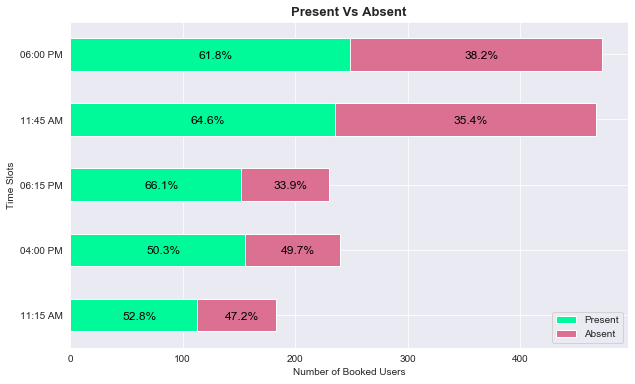

In [13]:
# Plotting the above data for better representation

**Would love to further describe my work and answer your querries.<br>
Contact: 9971045637; SantakMohanty0000@gmail.com**

Have a Nice day!<br>
Santak